[1.  0.5 0.  0.  0. ]
[1.  0.5 0.  0.  0. ]
[0.   0.75 1.   1.   1.  ]
[0.   0.75 1.   1.   1.  ]
[1.   0.25 0.   0.   0.  ]
[1.   0.25 0.   0.   0.  ]
[0.01002513 0.1026334  0.58578644 1.36754447 1.8       ]
[0.01002513 0.1026334  0.58578644 1.36754447 1.8       ]
[1.8        1.36754447 0.58578644 0.1026334  0.01002513]
[1.8        1.36754447 0.58578644 0.1026334  0.01002513]
(0.6666666666666667, 0.22222222222222243, 0.5656854249492306, -0.5999999999999694)
(0.6666666666666666, 0.2222222222222222, 0.565685424949238, -0.6000000000000001)
0.49999999999999983
0.5
25.0
shape > -1 does not hold
-20.0
[239.8671289  250.80481472 257.51454733 265.62674884 275.67883462
 283.37163382 300.19054661 313.64147686 318.57851541 310.63394427
 323.24134359 332.33729087 357.37201525 345.17599272 311.75149866
 350.42335555 400.72741472 402.18956915 582.46842962   0.        ]
[ 149.72194644  151.40884636  158.63271457  165.66842761  172.21801363
  182.9038034   186.3257216   195.96637186  217.16612305  25

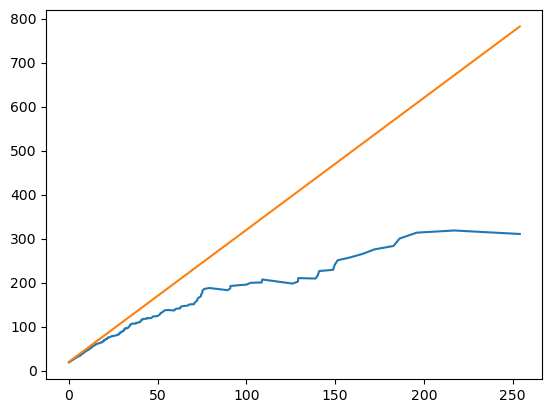

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.sandbox.distributions.genpareto import shape

current_path = os.getcwd()  # 获取当前工作目录
print("当前路径:", current_path)
current_path = current_path.replace('/samples', '')
print(sys.path)  # 显示所有模块搜索路径
sys.path.append(current_path)  # 添加自定义路径
print(sys.path)  # 显示所有模块搜索路径

def plot_fig(data):
    #1. 创建画布（调整大小适应大量曲线）
    plt.figure(figsize=(15, 8), dpi=100)
    
    # 2. 绘制所有折线（优化显示效果）
    for i, arr in enumerate(data):
        plt.plot(arr, 
                 linewidth=0.9,  # 细线避免重叠
                 alpha=0.3,      # 半透明区分重叠曲线
                 # color='blue'  # 统一颜色
                 ) 
    
    # 3. 添加图表元素
    plt.title(f"{n} Curves Visualization", fontsize=14)
    plt.xlabel("Index", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.5)  # 辅助网格线
    
    # 4. 显示/保存
    plt.tight_layout()  # 自动调整间距
    # plt.savefig('massive_lines.png', bbox_inches='tight')  # 保存高清图片
    plt.show()

# 金融衍生品定价模型测试

### 本文件测试QlStocks类中的Black - Scholes、Black - Scholes - Merton和Heston模型实现


## 测试案例

In [2]:
import QuantLib as ql
from src.QlCalendar import QlCalendar
from src.QlStocks import QlStocks

In [3]:
# 初始化日历
start_date = ql.Date(1, 1, 2023)
ql_calendar = QlCalendar(init_date=start_date)
# 创建股票实例
s = QlStocks(ql_calendar)

### 测试Black-Scholes模型

In [4]:
print("测试Black-Scholes模型:")
# 单个股票
s.black_scholes(100.0, sigma=0.25, code="AAPL")
# 多个股票
s.black_scholes([120.0, 80.0], sigma=[0.3, 0.2], code=["GOOG", "MSFT"])
s.df

测试Black-Scholes模型:


codes                                        price_quote dividend_quote  \
0  AAPL  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...           None   
1  GOOG  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...           None   
2  MSFT  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...           None   

  process_types                                          processes  
0  black_schole  <QuantLib.QuantLib.BlackScholesProcess; proxy ...  
1  black_schole  <QuantLib.QuantLib.BlackScholesProcess; proxy ...  
2  black_schole  <QuantLib.QuantLib.BlackScholesProcess; proxy ...

### 测试Black-Scholes-Merton模型

In [5]:
print("\n测试Black-Scholes-Merton模型:")
# 单个股票
s.black_scholes_merton(100.0, sigma=0.22, dividend_rate=0.03, code="AAPL_BSM")
# 多个股票
s.black_scholes_merton([115.0, 85.0], sigma=0.3, dividend_rate=[0.02, 0.04], code=["GOOG_BSM", "MSFT_BSM"])
s.df


测试Black-Scholes-Merton模型:


codes                                        price_quote  \
0      AAPL  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
1      GOOG  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
2      MSFT  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
3  AAPL_BSM  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
4  GOOG_BSM  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
5  MSFT_BSM  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   

                                      dividend_quote         process_types  \
0                                               None          black_schole   
1                                               None          black_schole   
2                                               None          black_schole   
3  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...  black_scholes_merton   
4  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...  black_scholes_merton   
5  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...  black_scholes_merton   

                                           processes  
0  <QuantLib.QuantLib.BlackScholesProcess; proxy ...  
1  <QuantLib.QuantLib.BlackScholesProcess; proxy ...  
2  <QuantLib.QuantLib.BlackScholesProcess; proxy ...  
3  <QuantLib.QuantLib.BlackScholesMertonProcess; ...  
4  <QuantLib.QuantLib.BlackScholesMertonProcess; ...  
5  <QuantLib.QuantLib.BlackScholesMertonProcess; ...

### 测试Heston模型

In [6]:
print("\n测试Heston模型:")
# 单个股票
s.heston(100.0, v0=0.04, kappa=1.0, theta=0.06, rho=-0.3, sigma=0.4, dividend_rate=0.01, code="AAPL_Heston")
# 多个股票
s.heston([110.0, 90.0],
         v0=[0.05, 0.03],
         kappa=[1.2, 0.8],
         theta=[0.05, 0.07],
         rho=[-0.2, -0.4],
         sigma=[0.3, 0.5],
         dividend_rate=[0.015, 0.025],
         code=["GOOG_Heston", "MSFT_Heston"])



测试Heston模型:


codes                                        price_quote  \
0  GOOG_Heston  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
1  MSFT_Heston  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   

                                      dividend_quote process_types  \
0  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...        heston   
1  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...        heston   

                                           processes  
0  <QuantLib.QuantLib.HestonProcess; proxy of <Sw...  
1  <QuantLib.QuantLib.HestonProcess; proxy of <Sw...

### 查看结果

In [7]:
s.df

codes                                        price_quote  \
0         AAPL  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
1         GOOG  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
2         MSFT  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
3     AAPL_BSM  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
4     GOOG_BSM  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
5     MSFT_BSM  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
6  AAPL_Heston  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
7  GOOG_Heston  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   
8  MSFT_Heston  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...   

                                      dividend_quote         process_types  \
0                                               None          black_schole   
1                                               None          black_schole   
2                                               None          black_schole   
3  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...  black_scholes_merton   
4  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...  black_scholes_merton   
5  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...  black_scholes_merton   
6  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...                heston   
7  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...                heston   
8  <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...                heston   

                                           processes  
0  <QuantLib.QuantLib.BlackScholesProcess; proxy ...  
1  <QuantLib.QuantLib.BlackScholesProcess; proxy ...  
2  <QuantLib.QuantLib.BlackScholesProcess; proxy ...  
3  <QuantLib.QuantLib.BlackScholesMertonProcess; ...  
4  <QuantLib.QuantLib.BlackScholesMertonProcess; ...  
5  <QuantLib.QuantLib.BlackScholesMertonProcess; ...  
6  <QuantLib.QuantLib.HestonProcess; proxy of <Sw...  
7  <QuantLib.QuantLib.HestonProcess; proxy of <Sw...  
8  <QuantLib.QuantLib.HestonProcess; proxy of <Sw...

In [8]:
steps = 252

In [9]:
aapl = s.df.iloc[0]
aapl

codes                                                          AAPL
price_quote       <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...
dividend_quote                                                 None
process_types                                          black_schole
processes         <QuantLib.QuantLib.BlackScholesProcess; proxy ...
Name: 0, dtype: object

In [10]:
one_process = aapl['processes']
process_generator = s.stock_path_generator(date_param = steps, process = one_process)
one_random_path1 = np.array(process_generator.next().value())
one_random_path1[:5], one_random_path1[-5:]

使用步数: 252 步
timesteps: 252, Time length(per year): 1.0start_date: January 3rd, 2023 end_date: January 10th, 2024


(array([100.        ,  99.50494974, 100.82059152, 103.48541973,
        102.03280887]),
 array([79.29206549, 78.37220725, 78.84736566, 78.62538709, 74.67350662]))

In [11]:
# 1. 生成示例数据（n个）
n = 500
path_bs = [np.array(process_generator.next().value()) for _ in range(n)]  # 替换为你的实际数据

In [12]:
np.array(path_bs)[:,-1].mean()

105.64956682798864

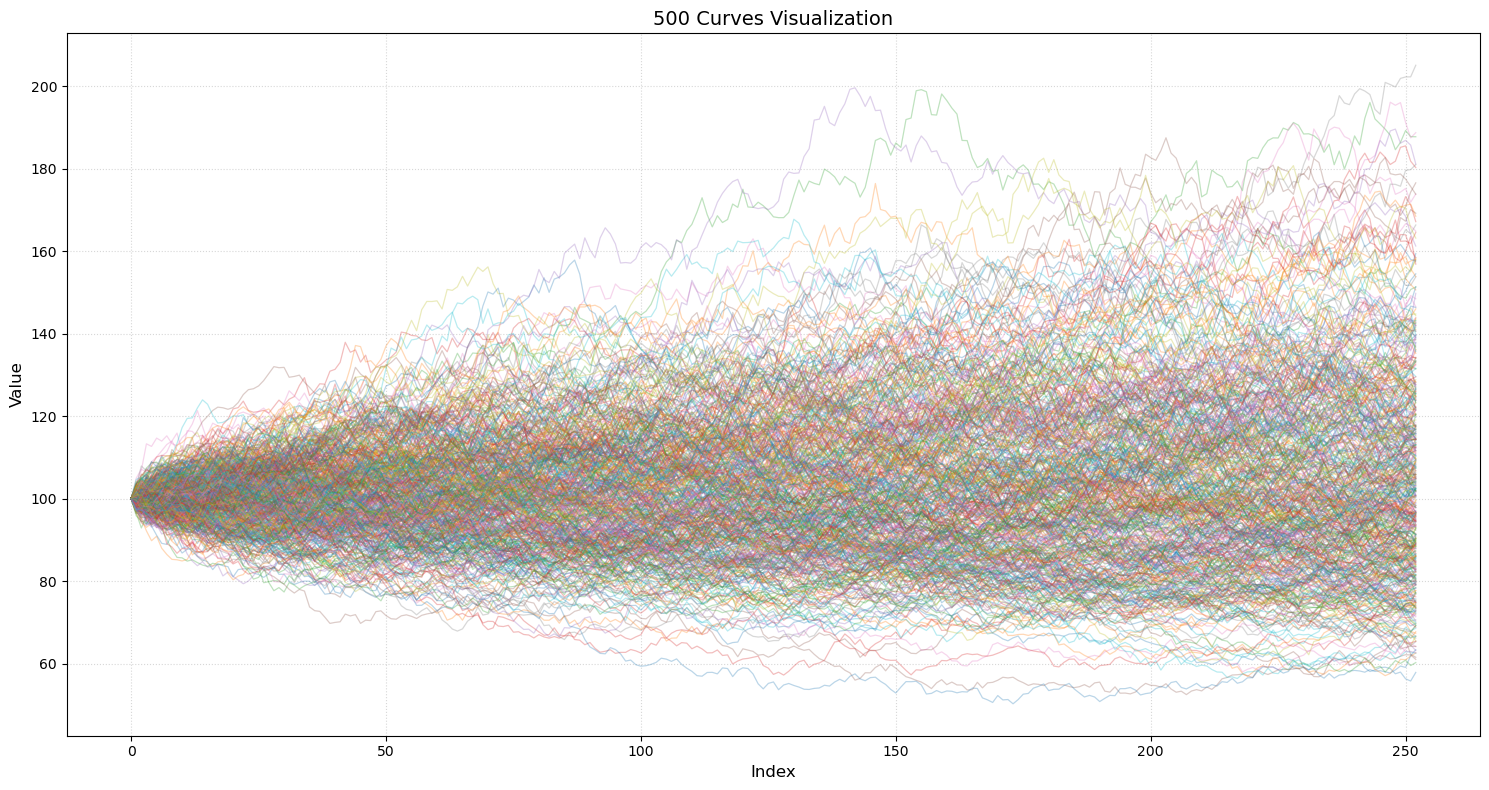

In [13]:
plot_fig(path_bs)

In [14]:
aapl_bsm = s.df.iloc[3]

使用步数: 252 步
timesteps: 252, Time length(per year): 1.0start_date: January 3rd, 2023 end_date: January 10th, 2024
102.39397795703867


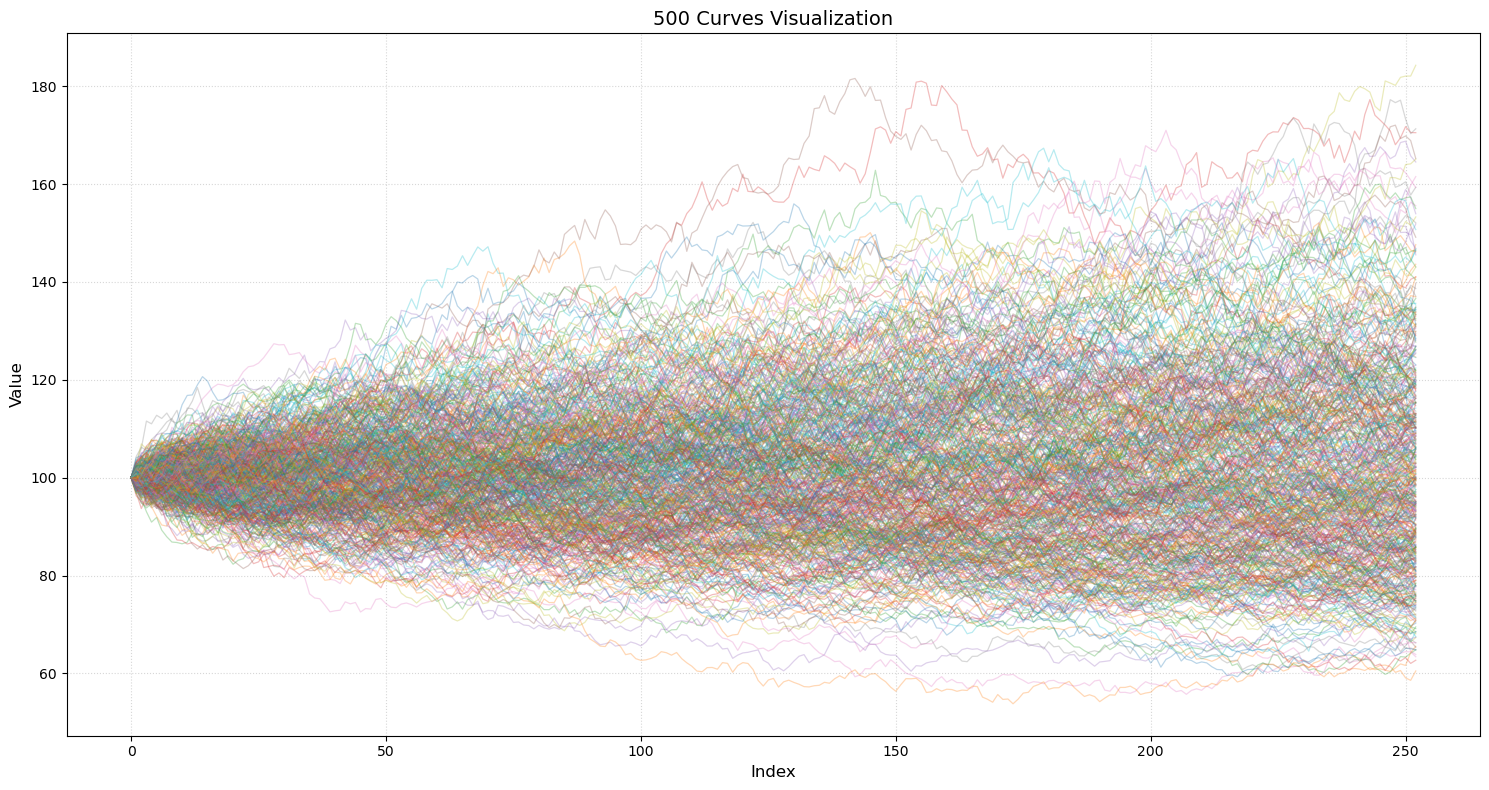

In [15]:
one_process = aapl_bsm['processes']
process_generator = s.stock_path_generator(steps, process = one_process)
n = 500
path_bsm = [np.array(process_generator.next().value()) for _ in range(n)]
print(np.array(path_bsm)[:,-1].mean())
plot_fig(path_bsm)

In [16]:
appl_heston = s.df.iloc[6]
appl_heston

codes                                                   AAPL_Heston
price_quote       <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...
dividend_quote    <QuantLib.QuantLib.SimpleQuote; proxy of <Swig...
process_types                                                heston
processes         <QuantLib.QuantLib.HestonProcess; proxy of <Sw...
Name: 6, dtype: object

In [17]:
one_process = appl_heston['processes']
process_generator = s.stock_path_generator(steps, process = one_process)

使用步数: 252 步
timesteps: 252, Time length(per year): 1.0start_date: January 3rd, 2023 end_date: January 10th, 2024


In [18]:
n = 500
path_heston = [np.array(process_generator.next().value()[0]) for _ in range(n)]

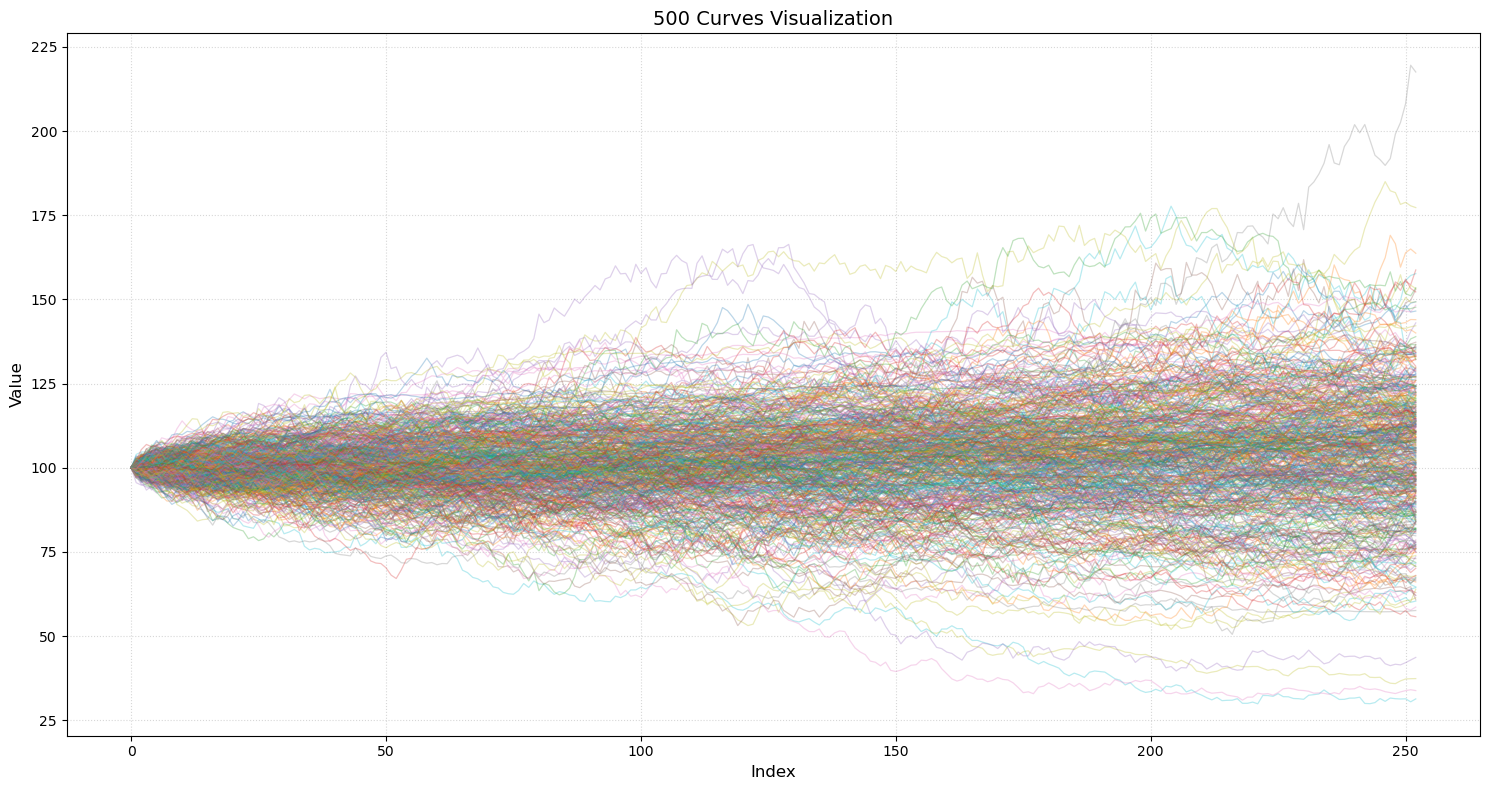

In [19]:
plot_fig(path_heston)

In [20]:
path_bs
path_bsm
path_heston

[array([100.        , 100.01983925, 100.03969808, 100.05957643,
        100.07947424, 100.09939147, 100.11932807, 100.13928398,
        100.15925916, 100.17925355, 100.1992671 , 100.21929976,
        100.23935148, 100.25942222, 100.27951192, 100.29962053,
        100.319748  , 100.33989429, 100.36005934, 100.38024311,
        100.40044554, 100.4206666 , 100.44090622, 100.46116437,
        100.481441  , 100.50173605, 100.52204948, 100.54238124,
        100.5627313 , 100.58309958, 100.60348607, 100.62389069,
        100.64431342, 100.6647542 , 100.68521299, 100.70568974,
        100.72618441, 100.74669695, 100.76722731, 100.78777545,
        100.80834133, 100.8289249 , 100.84952612, 100.87014494,
        100.89078132, 100.91143521, 100.93210657, 100.95279536,
        100.97350154, 100.99422505, 101.01496586, 101.03572393,
        101.0564992 , 101.07729165, 101.09810122, 101.11892788,
        101.13977158, 101.16063228, 101.18150994, 101.20240451,
        101.22331596, 101.24424425, 101.

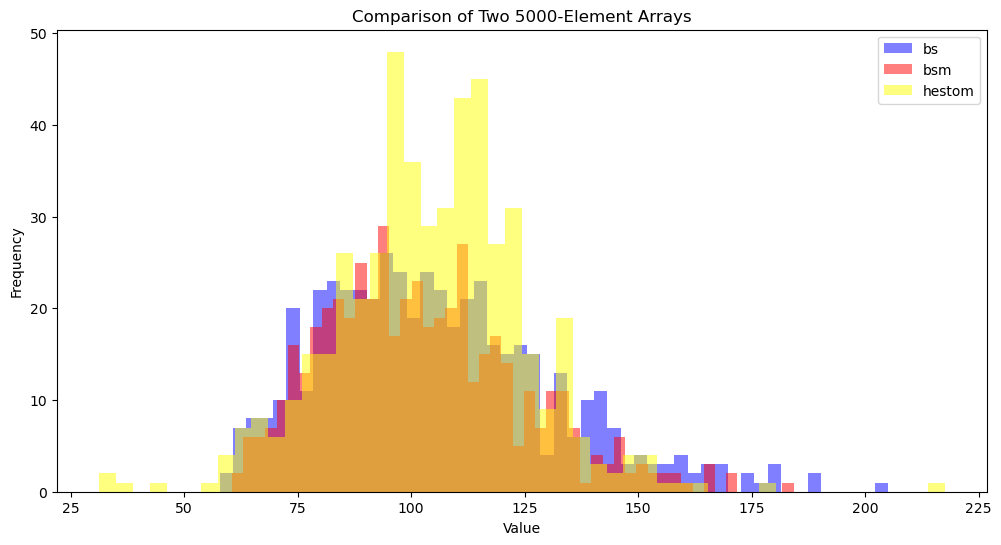

In [25]:
# 创建直方图对比
plt.figure(figsize=(12, 6))

# 绘制第一个数组的直方图
plt.hist([i[-1] for i in path_bs], bins=50, alpha=0.5, label='bs', color='blue')

# 绘制第二个数组的直方图
plt.hist([i[-1] for i in path_bsm], bins=50, alpha=0.5, label='bsm', color='red')

# 绘制第3个数组的直方图
plt.hist([i[-1] for i in path_heston], bins=50, alpha=0.5, label='hestom', color='yellow')

# 添加图表元素
plt.title('Comparison of Two 5000-Element Arrays')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()